In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



In [21]:
excel_data = pd.read_excel('./Dataset/Grade-I/GRADE-I(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,MANGALURU,2020-01-01,GRADE-I,AVERAGE,1000,Numbers,16000,30000,24000,Dakshina Kannada
1,MANGALURU,2020-01-02,GRADE-I,AVERAGE,750,Numbers,16000,28000,25000,Dakshina Kannada
2,MANGALURU,2020-01-04,GRADE-I,AVERAGE,500,Numbers,16000,28000,22000,Dakshina Kannada
3,MANGALURU,2020-01-13,GRADE-I,AVERAGE,1200,Numbers,16000,28000,25000,Dakshina Kannada
4,MANGALURU,2020-01-14,GRADE-I,AVERAGE,1200,Numbers,16000,28000,25000,Dakshina Kannada


In [6]:
df.isna().sum()

Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1467 non-null   object
 1   Date      1467 non-null   object
 2   Variety   1467 non-null   object
 3   Grade     1467 non-null   object
 4   Arrivals  1467 non-null   int64 
 5   Unit      1467 non-null   object
 6   Min       1467 non-null   int64 
 7   Max       1467 non-null   int64 
 8   Modal     1467 non-null   int64 
 9   District  1467 non-null   object
dtypes: int64(4), object(6)
memory usage: 114.7+ KB


In [22]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1467 non-null   object        
 1   Date      1467 non-null   datetime64[ns]
 2   Variety   1467 non-null   object        
 3   Grade     1467 non-null   object        
 4   Arrivals  1467 non-null   int64         
 5   Unit      1467 non-null   object        
 6   Min       1467 non-null   int64         
 7   Max       1467 non-null   int64         
 8   Modal     1467 non-null   int64         
 9   District  1467 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 114.7+ KB


In [24]:
df_test.sort_values(by='Date',inplace=True)

In [26]:
df_test = df[['Date','Min','Max','Modal']]
df_test

,Date,Min,Max,Modal
99,2015-01-01,12500,22500,18500
100,2015-01-02,12500,22500,18500
101,2015-01-03,12500,22500,18500
102,2015-01-05,12000,23500,19000
103,2015-01-06,12000,23500,19000
...,...,...,...,...
94,2021-06-01,27000,33000,29000
95,2021-07-01,27000,33000,29000
96,2021-11-23,2000,2700,2500
97,2022-08-18,14000,18000,16000


In [27]:
#df_test.to_csv('./Dataset/Grade-I/grade-I_test.csv',index=False)

In [29]:
excel_data1 = pd.read_excel('./Dataset/Grade-I/grade-I_test.xlsx')
df_1 = pd.DataFrame(excel_data1)

In [31]:
df_test = df_1

In [32]:
df_test.index = df_test['Date']
df_test

,Date,Min,Max,Modal
Date,,,,
2015-01-01,2015-01-01,12500,22500,18500
2015-01-02,2015-01-02,12500,22500,18500
2015-01-03,2015-01-03,12500,22500,18500
2015-01-05,2015-01-05,12000,23500,19000
2015-01-06,2015-01-06,12000,23500,19000
...,...,...,...,...
2020-12-24,2020-12-24,27000,33000,29000
2020-12-28,2020-12-28,27000,33000,29000
2020-12-29,2020-12-29,27000,33000,29000


In [33]:
df_test = df_test.drop('Date',axis=1)


In [34]:
df_test

,Min,Max,Modal
Date,,,
2015-01-01,12500,22500,18500
2015-01-02,12500,22500,18500
2015-01-03,12500,22500,18500
2015-01-05,12000,23500,19000
2015-01-06,12000,23500,19000
...,...,...,...
2020-12-24,27000,33000,29000
2020-12-28,27000,33000,29000
2020-12-29,27000,33000,29000


In [12]:
df_test.to_csv('./Dataset/Grade-I/grade-I_test.csv',index=False)

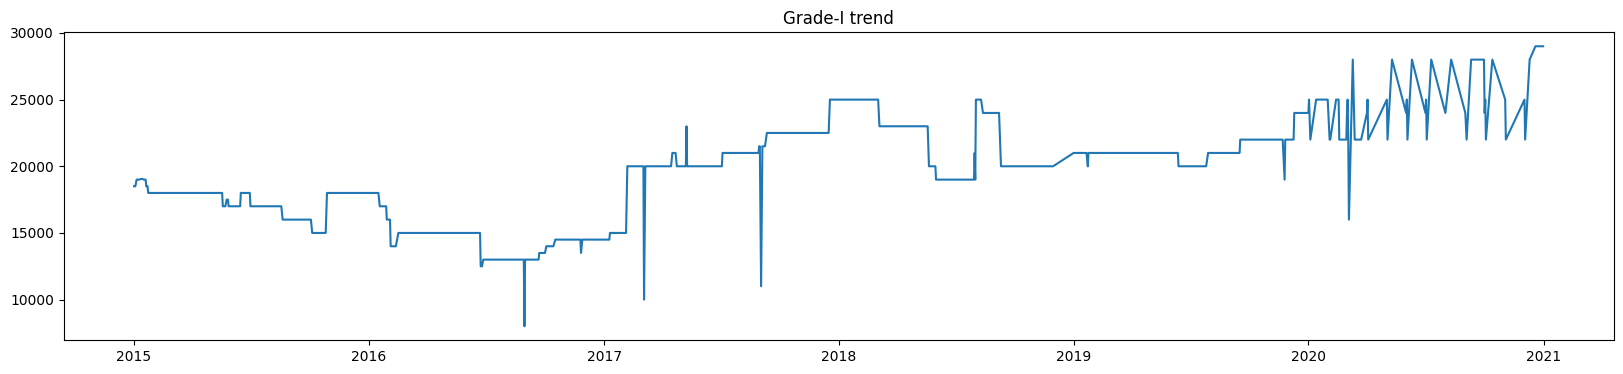

In [36]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Grade-I trend')
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler 

scaler_gradeI = MinMaxScaler(feature_range=(0,1))

In [38]:
df_gradeI = df_test

In [40]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_gradeI[columns_to_scale] = scaler_gradeI.fit_transform(df_gradeI[columns_to_scale])

In [42]:
import joblib

joblib.dump(scaler_gradeI, './Scaler Objects/scaler_grade-I.pkl')

['./Scaler Objects/scaler_grade-I.pkl']

In [43]:
df_test

,Min,Max,Modal
Date,,,
2015-01-01,0.431373,0.543478,0.50000
2015-01-02,0.431373,0.543478,0.50000
2015-01-03,0.431373,0.543478,0.50000
2015-01-05,0.411765,0.586957,0.52381
2015-01-06,0.411765,0.586957,0.52381
...,...,...,...
2020-12-24,1.000000,1.000000,1.00000
2020-12-28,1.000000,1.000000,1.00000
2020-12-29,1.000000,1.000000,1.00000


In [44]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2]   
        y.append(label)
    return np.array(X), np.array(y)

In [45]:
WINDOW_SIZE = 3 
X_gradeI, y_gradeI= df_to_X_y(df_gradeI,WINDOW_SIZE)
X_gradeI.shape, y_gradeI.shape

((1453, 3, 3), (1453, 3))

In [46]:
X_train_gradeI, y_train_gradeI = X_gradeI[:1300], y_gradeI[:1300]
X_val_gradeI, y_val_gradeI = X_gradeI[1300:1400], y_gradeI[1300:1400]
X_test_gradeI, y_test_gradeI = X_gradeI[1400:] ,y_gradeI[1400:] 

X_train_gradeI.shape, y_train_gradeI.shape, X_val_gradeI.shape, y_val_gradeI.shape, X_test_gradeI.shape, y_test_gradeI.shape

((1300, 3, 3), (1300, 3), (100, 3, 3), (100, 3), (53, 3, 3), (53, 3))

In [47]:
model_gradeI = Sequential()
model_gradeI.add(InputLayer((3,3))),
model_gradeI.add(LSTM(64)),
model_gradeI.add(Dense(64, 'relu')),
model_gradeI.add(Dense(30, 'relu')),
model_gradeI.add(Dense(3)),

model_gradeI.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 23611 (92.23 KB)
Trainable params: 23611 (92.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model_gradeI.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

In [49]:
hist_gradeI = model_gradeI.fit(X_train_gradeI, y_train_gradeI, validation_data=(X_val_gradeI, y_val_gradeI), epochs=100, verbose=2)

Epoch 1/100
41/41 - 3s - loss: 0.3008 - mean_absolute_error: 0.5283 - val_loss: 0.4497 - val_mean_absolute_error: 0.6701 - 3s/epoch - 84ms/step
Epoch 2/100
41/41 - 0s - loss: 0.2707 - mean_absolute_error: 0.5000 - val_loss: 0.3959 - val_mean_absolute_error: 0.6303 - 328ms/epoch - 8ms/step
Epoch 3/100
41/41 - 0s - loss: 0.2258 - mean_absolute_error: 0.4538 - val_loss: 0.3082 - val_mean_absolute_error: 0.5568 - 379ms/epoch - 9ms/step
Epoch 4/100
41/41 - 0s - loss: 0.1662 - mean_absolute_error: 0.3838 - val_loss: 0.2070 - val_mean_absolute_error: 0.4548 - 372ms/epoch - 9ms/step
Epoch 5/100
41/41 - 0s - loss: 0.0993 - mean_absolute_error: 0.2843 - val_loss: 0.0998 - val_mean_absolute_error: 0.3115 - 331ms/epoch - 8ms/step
Epoch 6/100
41/41 - 0s - loss: 0.0398 - mean_absolute_error: 0.1670 - val_loss: 0.0234 - val_mean_absolute_error: 0.1495 - 245ms/epoch - 6ms/step
Epoch 7/100
41/41 - 0s - loss: 0.0093 - mean_absolute_error: 0.0788 - val_loss: 0.0044 - val_mean_absolute_error: 0.0487 - 252

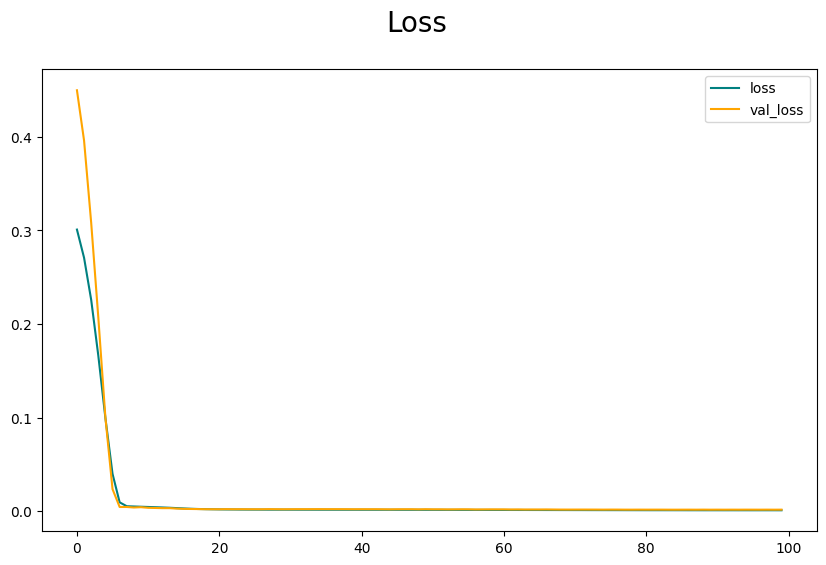

In [50]:
plt.figure(figsize=(10,6))
plt.plot(hist_gradeI.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_gradeI.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [51]:
def plot_predictions1D(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'Predictions':predictions.reshape(-1),'Actual':y})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['Predictions'][start:end],label='Predictions_modal')
    plt.plot(df['Actual'][start:end],label='Actual_modal')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    

In [54]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')

Mean absolute error for Train prediction is 0.011303453557324006
-------------------------------------------------------------------------------------
r2 for Train prediction is 91.34730440823448
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.444984    0.411765        0.548019    0.586957          0.502874   
1        0.441260    0.411765        0.561570    0.586957          0.509131   
2        0.436038    0.411765        0.576884    0.586957          0.516968   
3        0.430635    0.411765        0.592153    0.565217          0.525919   
4        0.430261    0.411765        0.585952    0.565217          0.525811   
5        0.430094    0.413725        0.578474    0.569565          0.525396   
6        0.430375    0.413725        0.572034    0.569565          0.525147   
7        0.430907    0.413725        0.573493    0.569565          0.525914   
8      

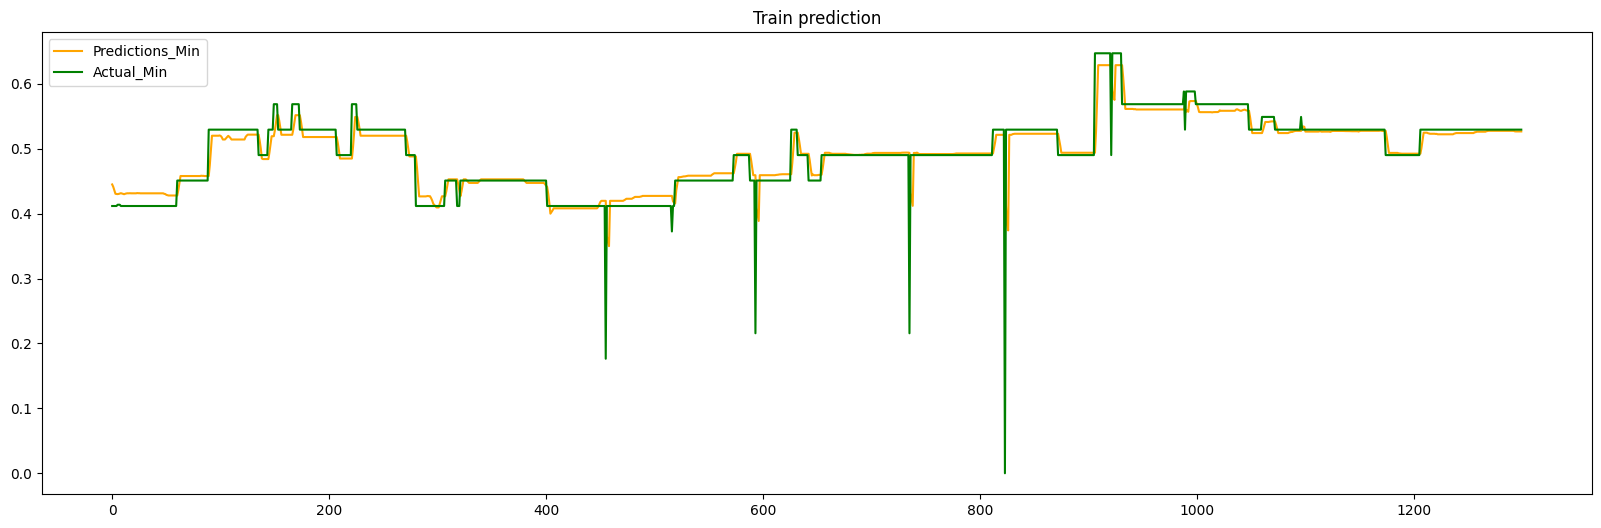

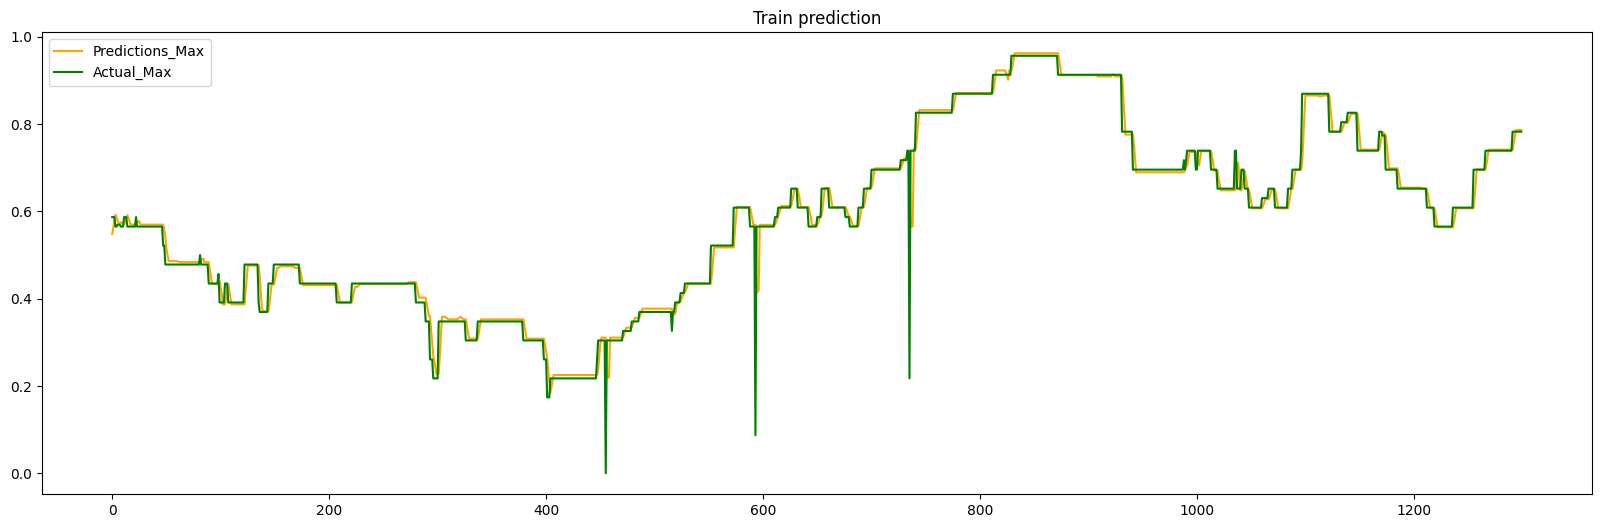

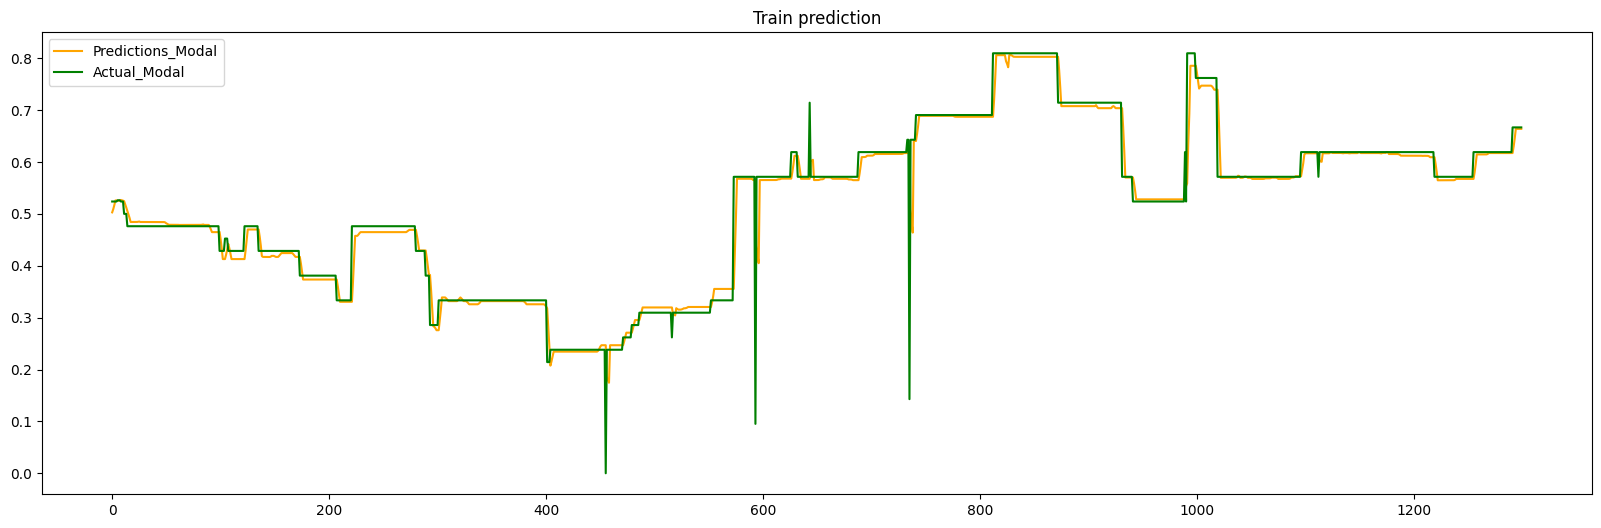

In [55]:
plot_predictions(model_gradeI, X_train_gradeI, y_train_gradeI, start=0, end=len(X_train_gradeI), tag='Train prediction')

Mean absolute error for Val prediction is 0.017564410916665146
-------------------------------------------------------------------------------------
r2 for Val prediction is 47.4414188134006
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.526642    0.529412        0.786445    0.782609          0.663847   
1        0.526642    0.529412        0.786445    0.782609          0.663847   
2        0.526642    0.529412        0.786445    0.782609          0.663847   
3        0.526642    0.529412        0.786445    0.782609          0.663847   
4        0.526642    0.529412        0.786445    0.782609          0.663847   
5        0.526642    0.529412        0.786445    0.782609          0.663847   
6        0.526642    0.529412        0.786445    0.782609          0.663847   
7        0.526642    0.529412        0.786445    0.782609          0.663847   
8        0.5

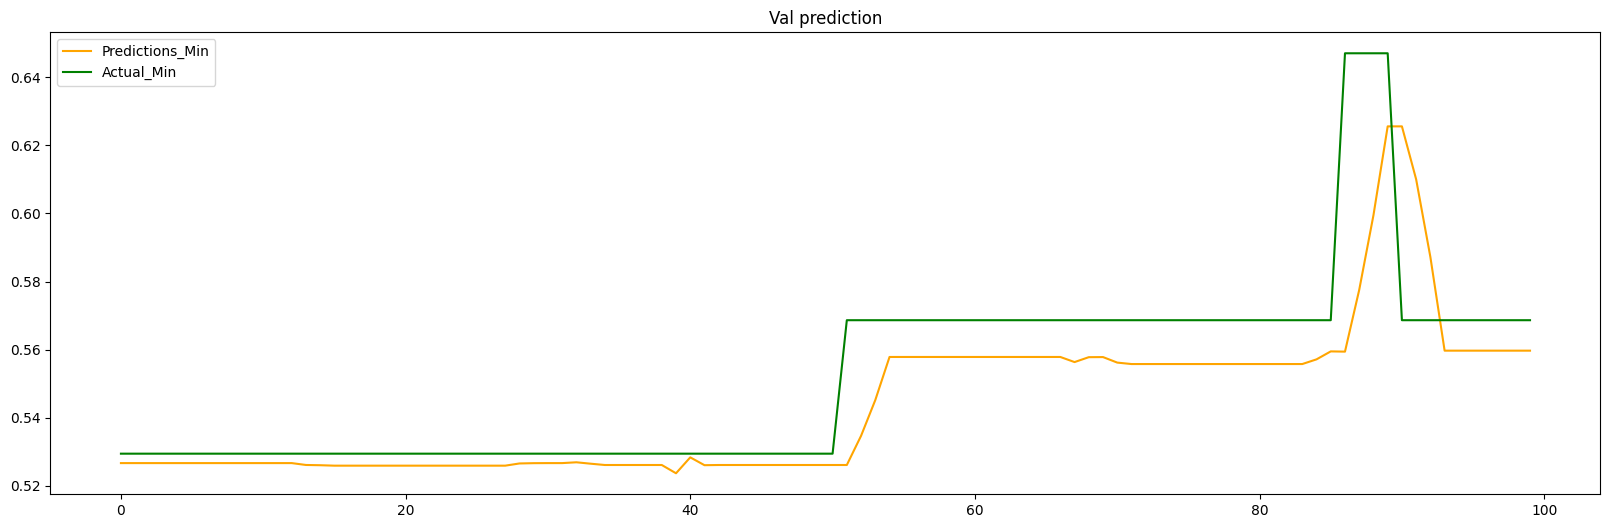

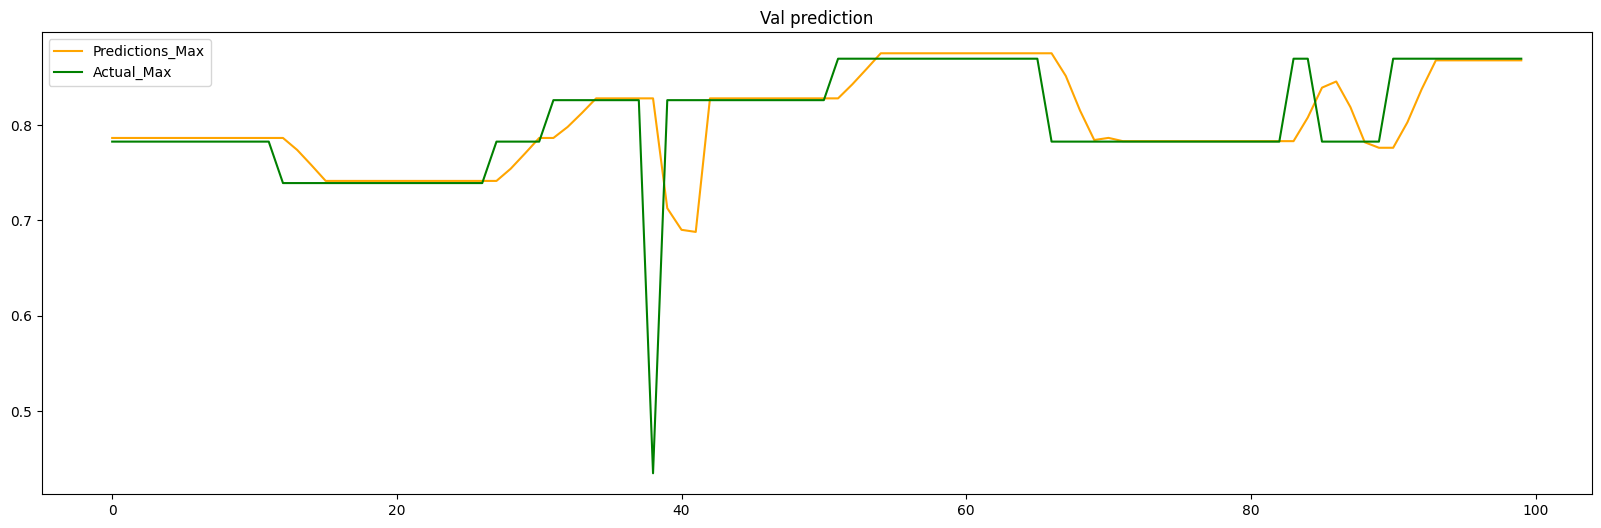

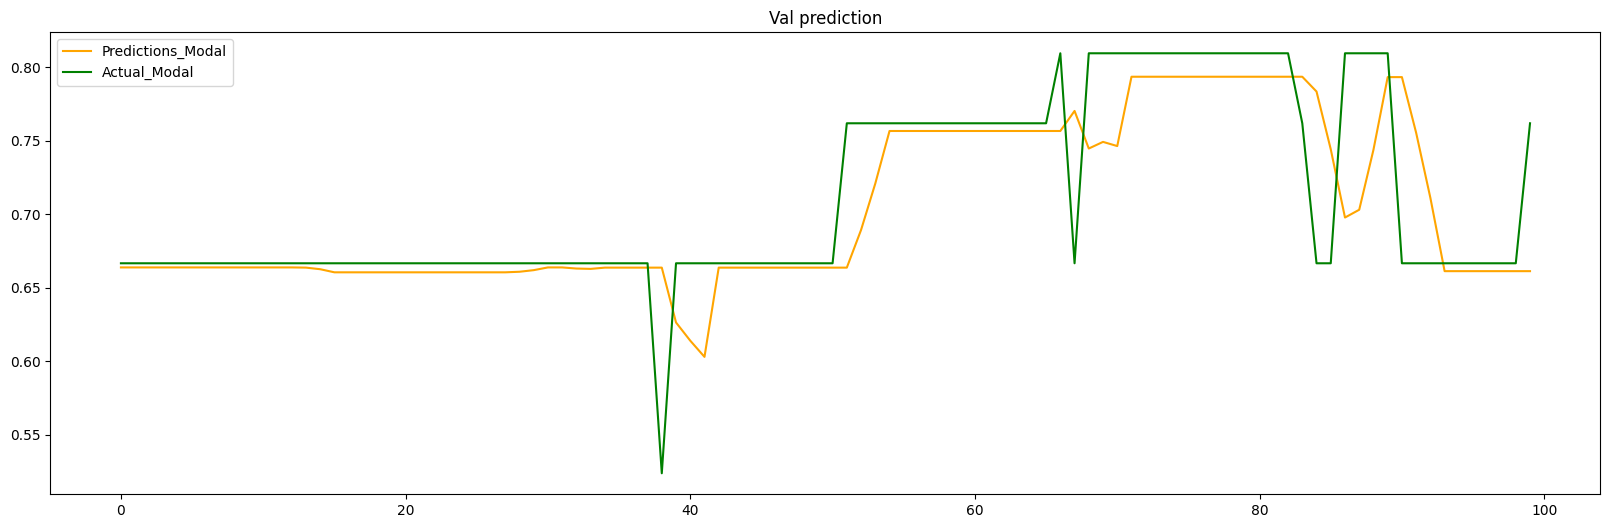

In [56]:
plot_predictions(model_gradeI, X_val_gradeI, y_val_gradeI, start=0, end=len(X_val_gradeI), tag='Val prediction')

Mean absolute error for Test prediction is 0.09151661290029744
-------------------------------------------------------------------------------------
r2 for Test prediction is 18.553216968111368
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.558781    0.568627        0.871978    0.782609          0.688423   
1        0.556866    0.568627        0.852610    0.869565          0.736639   
2        0.558970    0.490196        0.841328    0.347826          0.745427   
3        0.538576    0.882353        0.679012    0.956522          0.634162   
4        0.611761    0.568627        0.709755    0.782609          0.642092   
5        0.623839    0.568627        0.680749    0.782609          0.639129   
6        0.668375    0.568627        0.840605    0.782609          0.766789   
7        0.560630    0.568627        0.784263    0.782609          0.661949   
8        

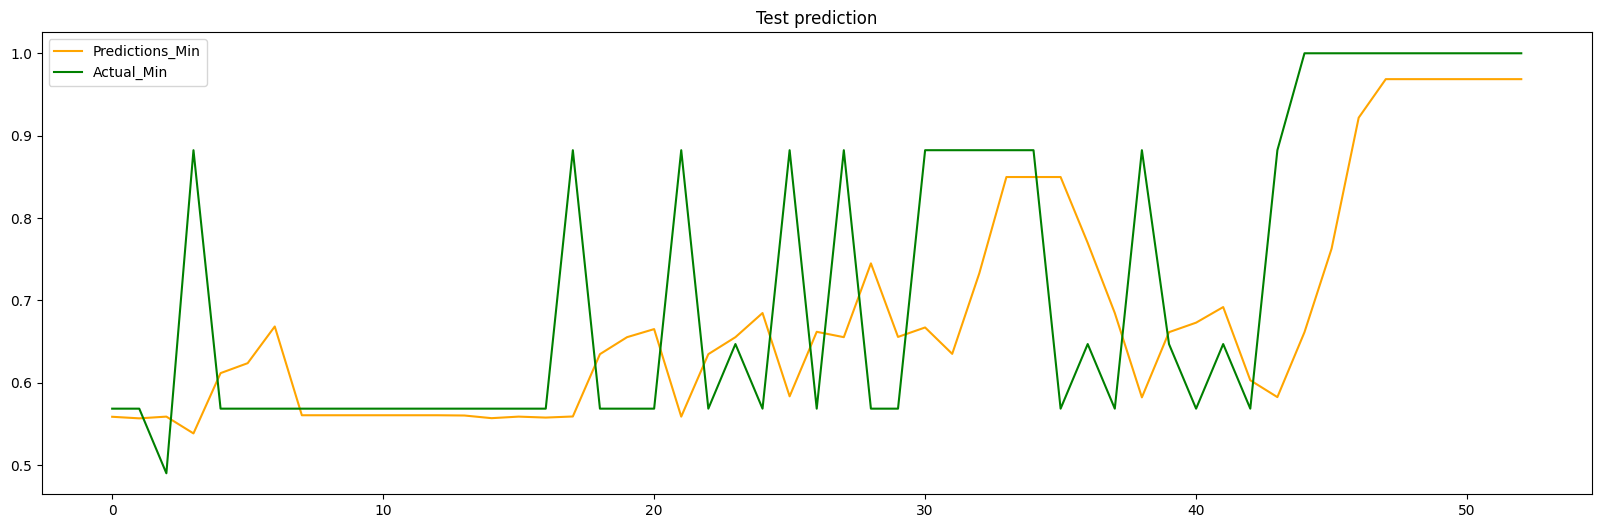

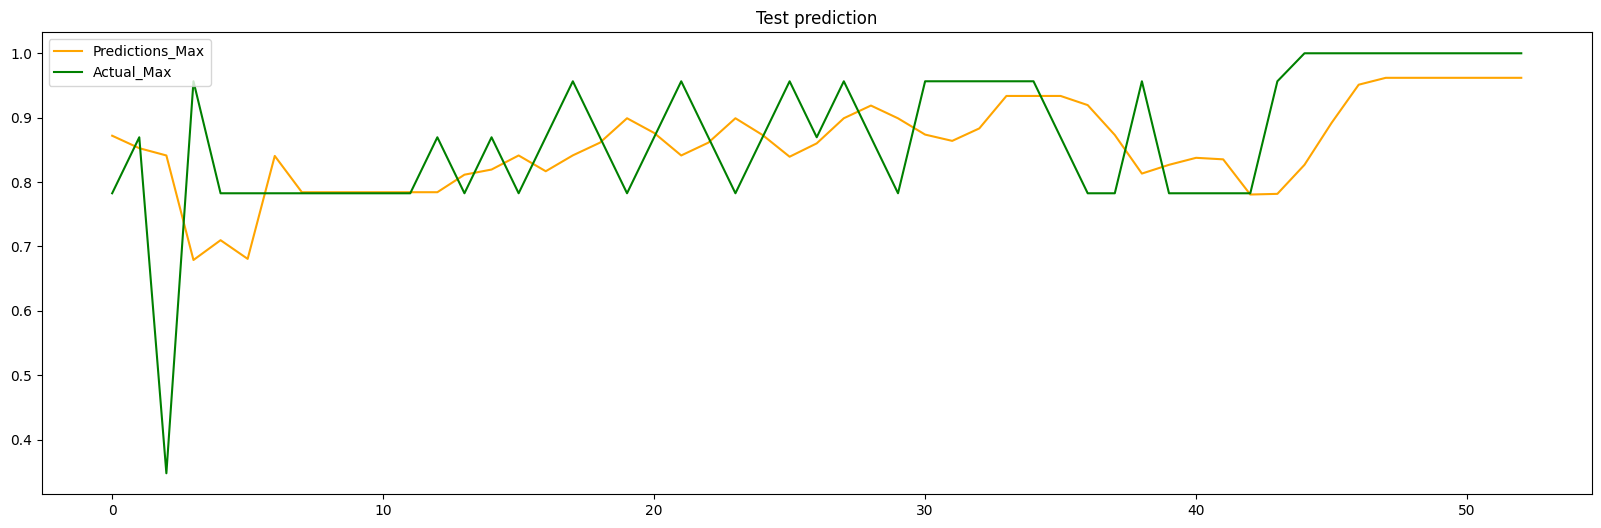

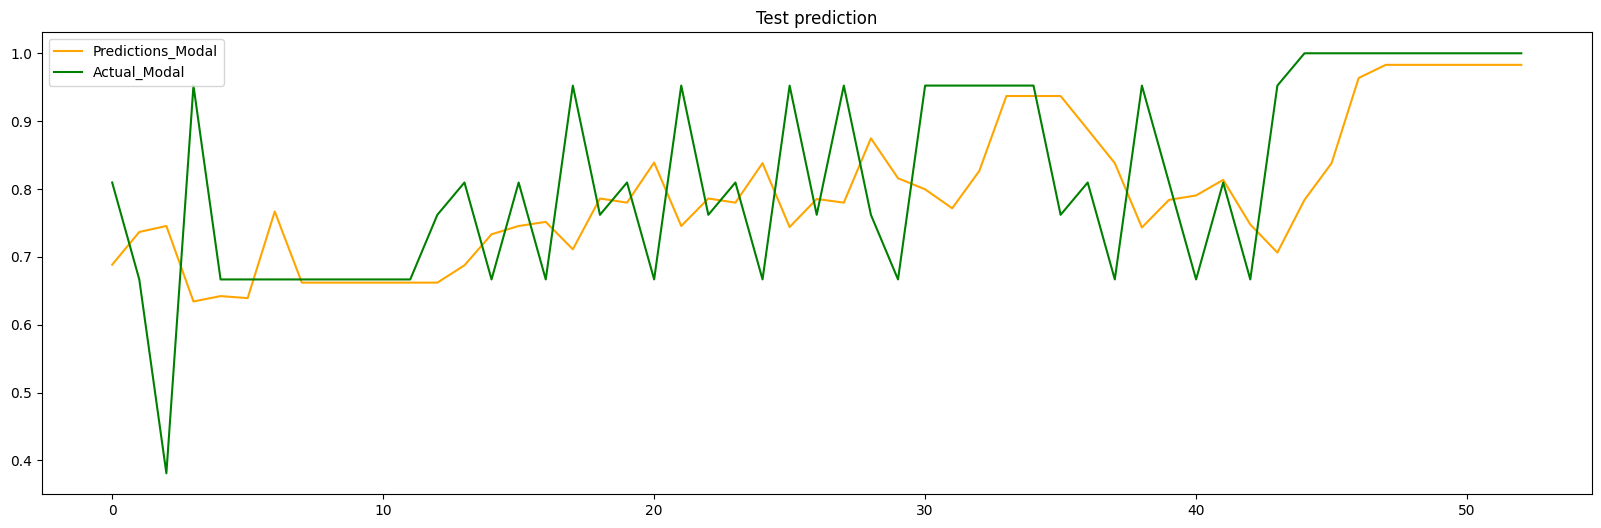

In [57]:
plot_predictions(model_gradeI, X_test_gradeI, y_test_gradeI, start=0, end=len(X_test_gradeI), tag='Test prediction')

In [58]:
# model_gradeI.save('./models/GradeI/model_gradeI.h5')

In [60]:
from tensorflow.keras.models import save_model


model_gradeI.save('./models/GradeI/model_gradeI(3,3)91.3473.keras')